# Counting Nanoparticles
by konkon
## Import packages

In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Load and Show Image
Load Image from URL of your directory

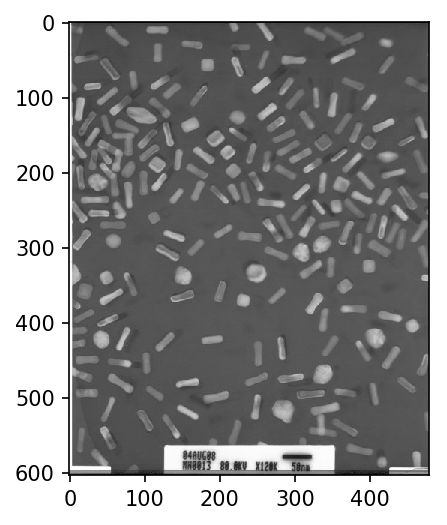

In [59]:
# Load Image from directory
img = cv2.imread('Au_nr_mhore.jpg', 0)

# Show image
fig = plt.figure(dpi=150)
plt.imshow(img)
plt.gray()

## Trimming image
Because scale bars or others are often bothering analysis

True

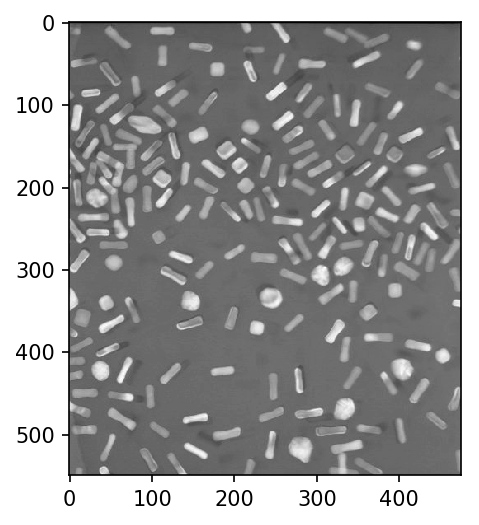

In [60]:
fig = plt.figure(dpi=150)
img_clp = img[0:550, 5:480]
plt.imshow(img_clp)
plt.gray()

cv2.imwrite('trimmed.png', img_clp)

## Thresholding image

True

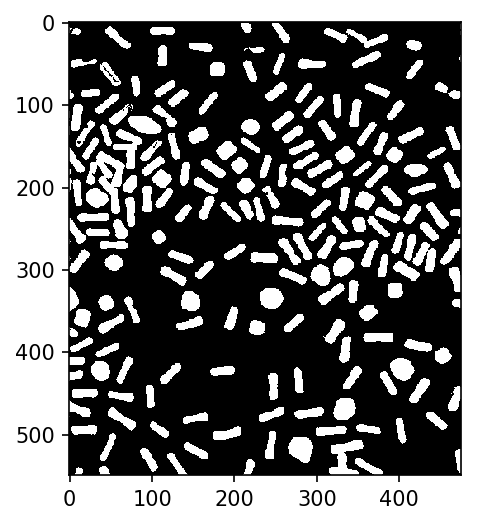

In [61]:
__, img_th = cv2.threshold(img_clp,95,255,cv2.THRESH_BINARY)
fig = plt.figure(dpi=150)
plt.imshow(img_th)
cv2.imwrite('th.png', img_th)

## FInd contours for each particles

Amounts of all contours =  231


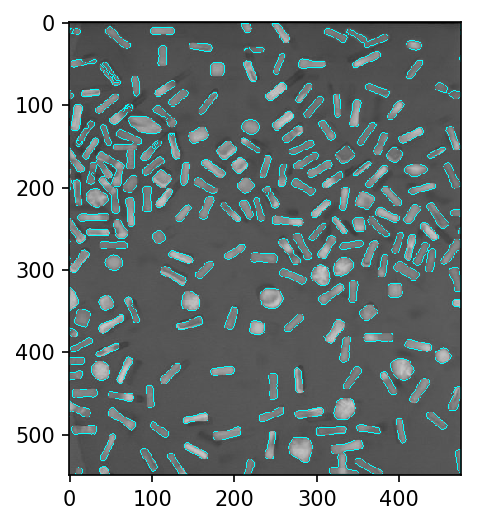

In [62]:
__,contours,__ = cv2.findContours(img_th,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

img_cnt = cv2.cvtColor(img_clp, cv2.COLOR_GRAY2BGR)
img_cnt = cv2.drawContours(img_cnt, contours, -1, (0,255,255), 1)

areas = []
for i in contours:
    a = cv2.contourArea(i)
    areas.append(a)

fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

print('Amounts of all contours = ', len(contours))

## Draw area histogram of particles

Text(0.5,0,'Areas (px^2)')

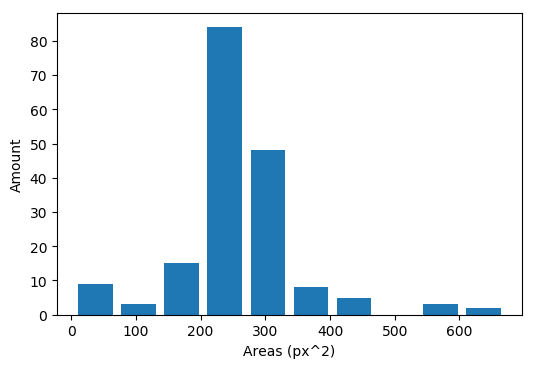

In [84]:
fig = plt.figure(dpi=100)
plt.hist(areas, bins=10, rwidth=0.8)
plt.ylabel('Amount')
plt.xlabel('Areas (px^2)')

## Eliminate particles on the edges

Amounts of all contours =  231
Amounts of drawn contours =  191


True

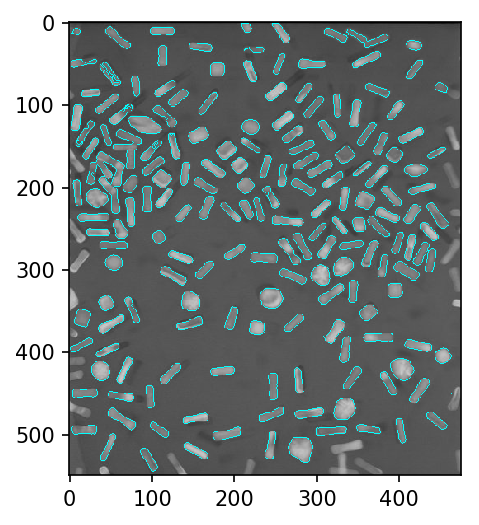

In [86]:
img_cnt = cv2.cvtColor(img_clp, cv2.COLOR_GRAY2BGR)

h,w = img_clp.shape
areas = []
for i in contours:
    #Add boolean to check the contours on the image edge.
    isPeripheral = np.any(i==0) or np.any(i[:,0][:,1]==h-1) or np.any(i[:,0][:,0]==w-1)
    
    if isPeripheral:
        pass
    else:
        img_cnt = cv2.drawContours(img_cnt, i, -1, (0,255,255), 1)
        a = cv2.contourArea(i)
        areas.append(a)

print('Amounts of all contours = ', len(contours))
print('Amounts of drawn contours = ', len(areas))
fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

cv2.imwrite('contours_exEdges.png', img_cnt)

## Draw Histogram of particles (exclude edges)

Text(0.5,0,'Areas (px^2)')

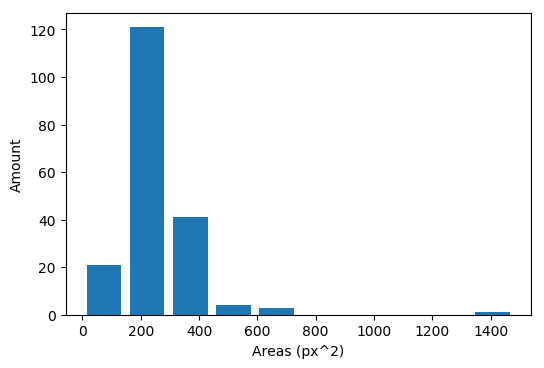

In [87]:
fig = plt.figure(dpi=100)
plt.hist(areas, bins=10, rwidth=0.8)
plt.ylabel('Amount')
plt.xlabel('Areas (px^2)')

## Eliminate conbined particles
by thresholding area ratios (Area of the particle / Area of the rotated rectangle)

Amounts of all contours =  231
Amounts of drawn contours =  177


True

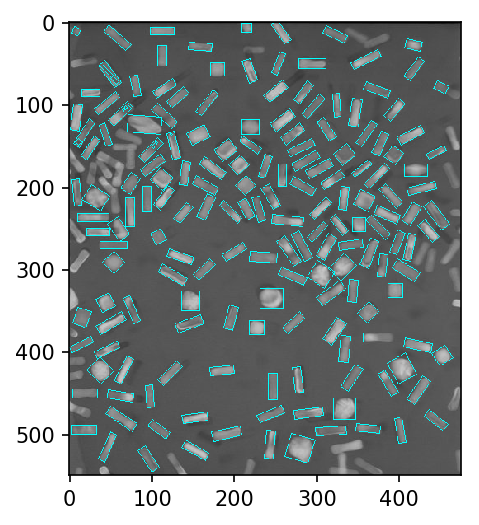

In [88]:
img_cnt = cv2.cvtColor(img_clp, cv2.COLOR_GRAY2BGR)

h,w = img_th.shape
th = 0.65

areas = []
aspect_ratios = []
complexity = []

for i in contours:
    isPeripheral = np.any(i==0) or np.any(i[:,0][:,1]==h-1) or np.any(i[:,0][:,0]==w-1)
    if isPeripheral:
        pass
    else:
        a = cv2.contourArea(i)
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        if(a/(rect[1][0] * rect[1][1] + 1e-12) > th):
            areas.append(a)
            aspect_ratios.append(max(rect[1][0],rect[1][1])/min(rect[1][0],rect[1][1]))
            img_cnt = cv2.drawContours(img_cnt,[box],0,(0,255,255),1)

        c = a/(rect[1][0] * rect[1][1] + 1e-12)
        complexity.append(c)
        
print('Amounts of all contours = ', len(contours))
print('Amounts of drawn contours = ', len(areas))
fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

cv2.imwrite('contours_exComb.png', img_cnt)

## Draw Histogram of particles (exclude edges and combined)

Text(0.5,0,'Areas (px^2)')

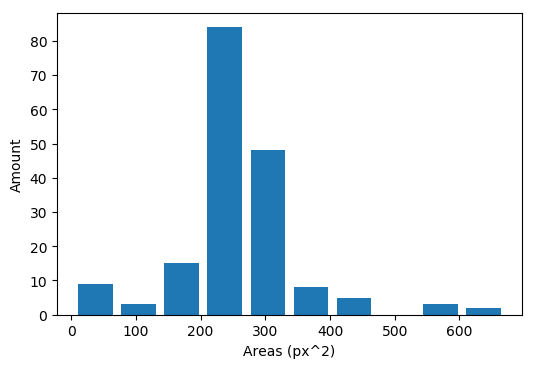

In [90]:
fig = plt.figure(dpi=100)
plt.hist(areas, bins=10, rwidth=0.8)
plt.ylabel('Amount')
plt.xlabel('Areas (px^2)')

## Plot histogram of aspect ratios

(array([26.,  8.,  1.,  3.,  1.,  1.,  1.,  5.,  2., 12., 11., 20., 21.,
        20., 14., 13.,  5.,  6.,  4.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([1.        , 1.16000001, 1.32000003, 1.48000004, 1.64000005,
        1.80000007, 1.96000008, 2.12000009, 2.28000011, 2.44000012,
        2.60000013, 2.76000015, 2.92000016, 3.08000018, 3.24000019,
        3.4000002 , 3.56000022, 3.72000023, 3.88000024, 4.04000026,
        4.20000027, 4.36000028, 4.5200003 , 4.68000031, 4.84000032,
        5.00000034]),
 <a list of 25 Patch objects>)

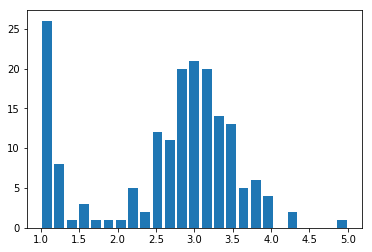

In [19]:
plt.hist(aspect_ratios, bins=25, rwidth=0.8)

## Classification particles by aspect ratios
Assuming threshold values by histograms

Amounts of rectangle =  135
Amounts of square-like contours =  34


True

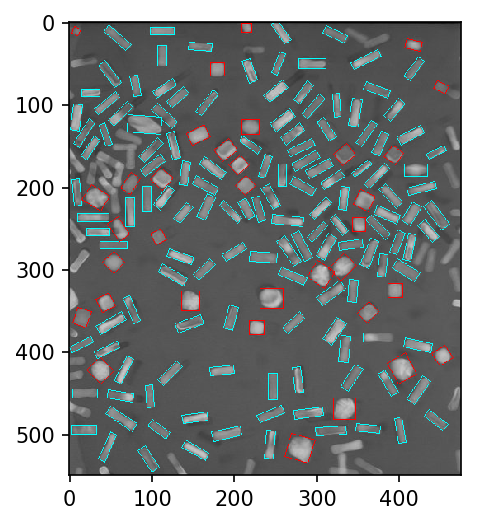

In [92]:
img_cnt = cv2.cvtColor(img_clp, cv2.COLOR_GRAY2BGR)

h,w = img_th.shape
th = 0.65

areas = [[],[]]
aspect_ratios = [[],[]]
len_max = [[],[]]
len_min = [[],[]]

for i in contours:
    isPeripheral = np.any(i==0) or np.any(i[:,0][:,1]==h-1) or np.any(i[:,0][:,0]==w-1)
    if isPeripheral:
        pass
    else:
        a = cv2.contourArea(i)
        rect = cv2.minAreaRect(i)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        if(a/(rect[1][0] * rect[1][1] + 1e-12) > th and a > 50):
            aspect_ratio = max(rect[1][0],rect[1][1])/min(rect[1][0],rect[1][1])
            if(aspect_ratio > 1.75):
                img_cnt = cv2.drawContours(img_cnt,[box],0,(0,255,255),1)
                aspect_ratios[0].append(aspect_ratio)
                areas[0].append(a)
                len_max[0].append(max(rect[1][0],rect[1][1]))
                len_min[0].append(min(rect[1][0],rect[1][1]))
            else:
                aspect_ratios[1].append(aspect_ratio)
                areas[1].append(a)
                len_max[1].append(max(rect[1][0],rect[1][1]))
                len_min[1].append(min(rect[1][0],rect[1][1]))
                img_cnt = cv2.drawContours(img_cnt,[box],0,(255,0,0),1)

print('Amounts of rectangle = ', len(areas[0]))
print('Amounts of square-like contours = ', len(areas[1]))

fig = plt.figure(dpi=150)
plt.imshow(img_cnt)

cv2.imwrite('results.png', img_cnt)

## Analyze rectangle particles

(array([ 8., 34., 52., 37.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([ 6.7154727 ,  8.13983588,  9.56419907, 10.98856225, 12.41292543,
        13.83728862, 15.2616518 , 16.68601499, 18.11037817, 19.53474135,
        20.95910454]),
 <a list of 10 Patch objects>)

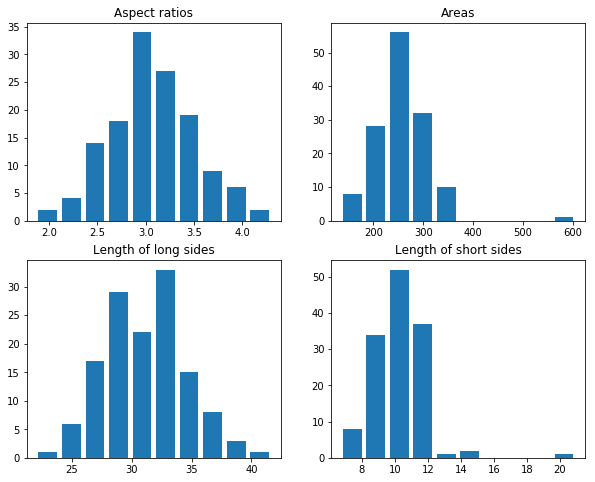

In [93]:
bins = 10

fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('Aspect ratios')
plt.hist(aspect_ratios[0], bins, rwidth = 0.8)

plt.subplot(222)
plt.title('Areas')
plt.hist(areas[0], bins, rwidth = 0.8)

plt.subplot(223)
plt.title('Length of long sides')
plt.hist(len_max[0], bins, rwidth = 0.8)

plt.subplot(224)
plt.title('Length of short sides')
plt.hist(len_min[0], bins, rwidth = 0.8)

## Analyze square-like particles

(array([ 4.,  3., 15.,  7.,  4.,  1.]),
 array([ 8.49705791, 12.02586126, 15.55466461, 19.08346796, 22.61227131,
        26.14107466, 29.66987801]),
 <a list of 6 Patch objects>)

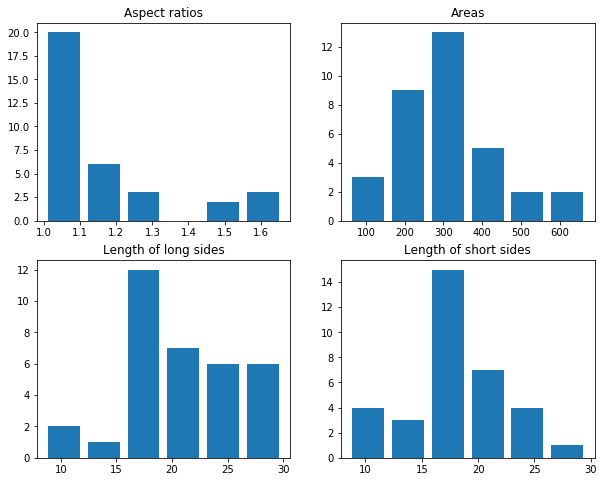

In [94]:
bins = 6

fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.title('Aspect ratios')
plt.hist(aspect_ratios[1], bins, rwidth = 0.8)

plt.subplot(222)
plt.title('Areas')
plt.hist(areas[1], bins, rwidth = 0.8)

plt.subplot(223)
plt.title('Length of long sides')
plt.hist(len_max[1], bins, rwidth = 0.8)

plt.subplot(224)
plt.title('Length of short sides')
plt.hist(len_min[1], bins, rwidth = 0.8)